In [24]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading train/test data

In [17]:
with open('C:/Users/kimta/Downloads/basketball_train.pkl', 'rb') as train_data:
    train = pickle.load(train_data)
    
with open('C:/Users/kimta/Downloads/basketball_test.pkl', 'rb') as test_data:
    test = pickle.load(test_data)

# Calculating "k" by cross validation

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# find best k, range from 3 to half of the number of data
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 1):
    k_list.append(i)
    
cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

In [21]:
# 10-fold cv
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())
    
cross_validation_scores

[0.9,
 0.9,
 0.9,
 0.9,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.925,
 0.9125,
 0.9125,
 0.9125,
 0.925,
 0.9,
 0.9125,
 0.9125,
 0.9125,
 0.9,
 0.9,
 0.875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.8625,
 0.825,
 0.825,
 0.825,
 0.825,
 0.8125]

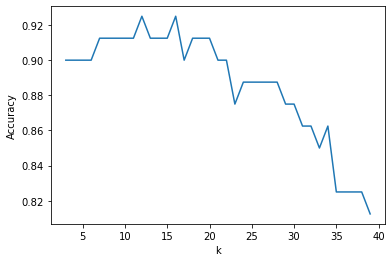

In [22]:
# visualize accuracy according to k
plt.plot(k_list, cross_validation_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [23]:
# fin best k
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k : " + str(k))

The best number of k : 12


# Using two features only (3P, BLK)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

# setup knn using train data
knn.fit(x_train, y_train.values.ravel())

# select data feature to be used for prediction
x_test = test[['3P', 'BLK']]

# select target value
y_test = test[['Pos']]

# test
pred = knn.predict(x_test)

In [26]:
# check ground_truth with knn prediction
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,C,C
1,C,C
2,SG,SG
3,C,C
4,SG,SG
5,C,C
6,SG,SG
7,C,C
8,SG,SG
9,C,C


In [27]:
# check accuracy
print("accuracy is " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy is 1.0


# Using three features (3P, BLK, TRB)

In [28]:
knn = KNeighborsClassifier(n_neighbors=k)

# select data features to be used in train
x_train = train[['3P', 'BLK', 'TRB']]
# select target
y_train = train[['Pos']]

# build knn model
knn.fit(x_train, y_train.values.ravel())

# select features to be used for prediction
x_test = test[['3P', 'BLK', 'TRB']]

#select target
y_test = test[['Pos']]

# test
pred = knn.predict(x_test)

In [29]:
# check ground_truth with knn prediction
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,C,C
1,C,C
2,SG,SG
3,C,C
4,SG,SG
5,C,C
6,SG,SG
7,C,C
8,SG,SG
9,C,C


In [30]:
# check accuracy
print("accuracy is " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy is 0.95
